In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.shape

(5110, 12)

### Statistical and Descriptive Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [8]:
df.mean()

id                   36517.829354
age                     43.226614
hypertension             0.097456
heart_disease            0.054012
avg_glucose_level      106.147677
bmi                     28.893237
stroke                   0.048728
dtype: float64

In [9]:
df.median()

id                   36932.000
age                     45.000
hypertension             0.000
heart_disease            0.000
avg_glucose_level       91.885
bmi                     28.100
stroke                   0.000
dtype: float64

In [10]:
df.std()

id                   21161.721625
age                     22.612647
hypertension             0.296607
heart_disease            0.226063
avg_glucose_level       45.283560
bmi                      7.854067
stroke                   0.215320
dtype: float64

In [11]:
df.var()

id                   4.478185e+08
age                  5.113318e+02
hypertension         8.797552e-02
heart_disease        5.110447e-02
avg_glucose_level    2.050601e+03
bmi                  6.168636e+01
stroke               4.636264e-02
dtype: float64

In [12]:
df['Residence_type'].mode()[0]

'Urban'

In [13]:
CV=(df['avg_glucose_level'].std()/df['avg_glucose_level'].mean())*100 #CV
CV

42.660905434920615

In [14]:
b=df['avg_glucose_level'].min()
b

55.12

In [15]:
a=df['avg_glucose_level'].max()
a

271.74

In [16]:
Range=a-b
Range

216.62

In [17]:
Standard_Error=(df['avg_glucose_level'].std())/np.sqrt(len(df))
Standard_Error

0.6334759234410781

In [18]:
df.skew() #positive skew

id                  -0.019913
age                 -0.137059
hypertension         2.715392
heart_disease        3.947244
avg_glucose_level    1.572284
bmi                  1.055340
stroke               4.193284
dtype: float64

In [19]:
df.kurt() #mesokurti

id                   -1.212368
age                  -0.991010
hypertension          5.375456
heart_disease        13.586052
avg_glucose_level     1.680479
bmi                   3.362659
stroke               15.589736
dtype: float64

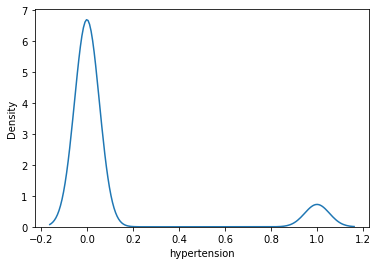

In [20]:
sns.kdeplot(data=df,x='hypertension')
plt.show()

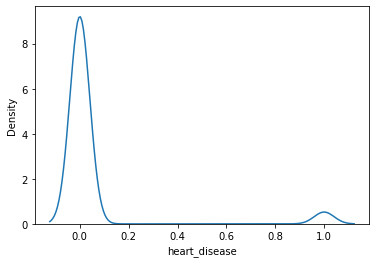

In [21]:
sns.kdeplot(data=df,x='heart_disease')
plt.show()

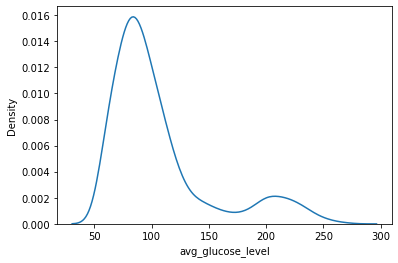

In [22]:
sns.kdeplot(data=df,x='avg_glucose_level')
plt.show()

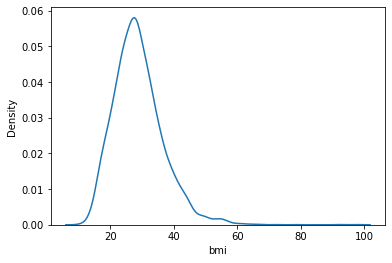

In [23]:
sns.kdeplot(data=df,x='bmi')
plt.show()

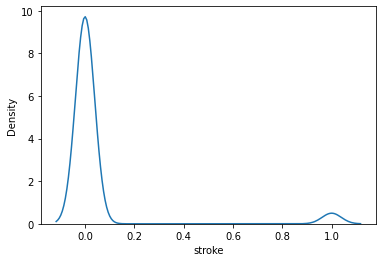

In [24]:
sns.kdeplot(data=df,x='stroke')
plt.show()

From above we can say expect bmi and Avg glucose level all other prameters are in normal distribution ( bmi and Avg glucose are right skewed

In [25]:
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


From above we can say that no data is corelated with each other.

In [26]:
df.cov()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,4.478185e+08,1693.043854,22.279895,-6.199628,1046.779923,508.542096,29.107945
age,1.693044e+03,511.331792,1.853816,1.348494,243.882731,59.061247,1.194146
hypertension,2.227989e+01,1.853816,0.087976,0.007262,2.343429,0.380736,0.008169
heart_disease,-6.199628e+00,1.348494,0.007262,0.051104,1.656923,0.070465,0.006567
avg_glucose_level,1.046780e+03,243.882731,2.343429,1.656923,2050.600820,61.234769,1.286527
bmi,5.085421e+02,59.061247,0.380736,0.070465,61.234769,61.686364,0.067199
stroke,2.910794e+01,1.194146,0.008169,0.006567,1.286527,0.067199,0.046363


In this way we have done the stastical and descriptive and graphical Analysis

#### Exploratory Data Analysis (Univariate, Bi-variate)

In [27]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [28]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

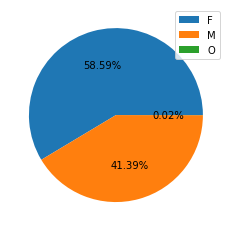

In [29]:
plt.pie(df.gender.value_counts(),autopct='%.2f%%')
plt.legend(['F','M','O'])
plt.show()

From above we can say that data contins more data entries of female.

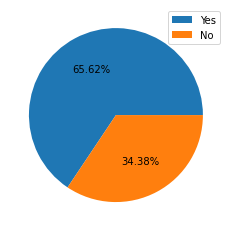

In [30]:
plt.pie(df.ever_married.value_counts(),autopct='%.2f%%')
plt.legend(['Yes','No'])
plt.show()

In this dataset more married people are present

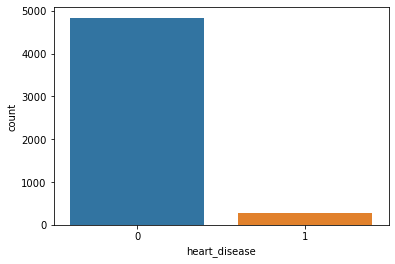

In [31]:
sns.countplot(df['heart_disease'])
plt.show()

From we can say the maximum number of people dont have heart desease.

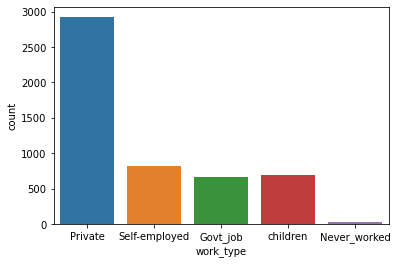

In [32]:
sns.countplot(df['work_type'])
plt.show()

This data consist of more people who belongs to private sector followed by self employement.

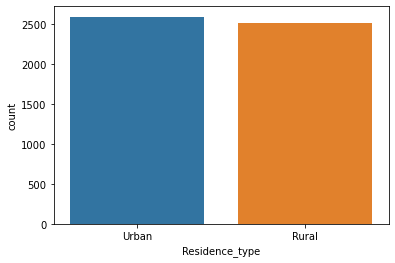

In [33]:
sns.countplot(df['Residence_type'])
plt.show()

This data belongs to rural as well as urban areas but people are more from urban areas.

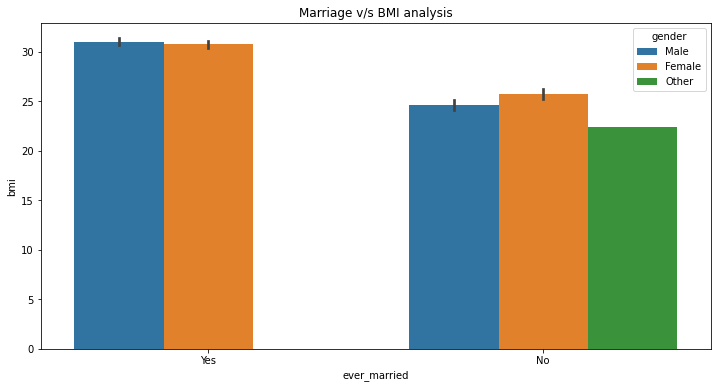

In [34]:
plt.rcParams['figure.figsize']=(12,6)
sns.barplot(data=df,x='ever_married',y='bmi',hue='gender')
plt.xlabel('ever_married')
plt.ylabel('bmi')
plt.title('Marriage v/s BMI analysis')
plt.show()

From above we can sayThe married people irrespective of gender having high BMI and unmarried people specially other  category have low BMI

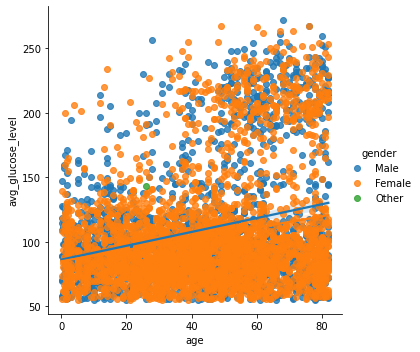

In [35]:
plt.rcParams['figure.figsize']=(12,6)
sns.lmplot(data=df,x='age',y='avg_glucose_level',hue='gender')
plt.xlabel('age')
plt.ylabel('avg_glucose_level')
plt.show()

From above we can say that The average glucose level of female is almost equal for all the age group whereas for male as age increase the glucose level increases.

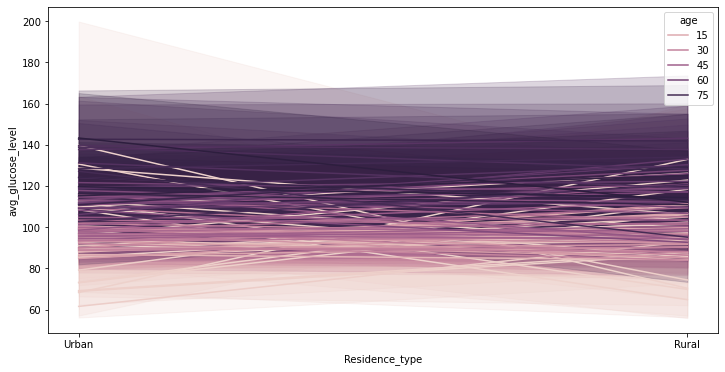

In [36]:
sns.lineplot(data=df,x='Residence_type',y='avg_glucose_level',hue='age')
plt.show()

From above we can say that People from rural area of age 60 above have more avg_glucose_level and which is very close for urban area.

#### Check if data is having missing Values and fill

In [37]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [38]:
df['bmi'].fillna(df['bmi'].median(),inplace=True)

In [39]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#### Checking Outliers and removing:

In [40]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

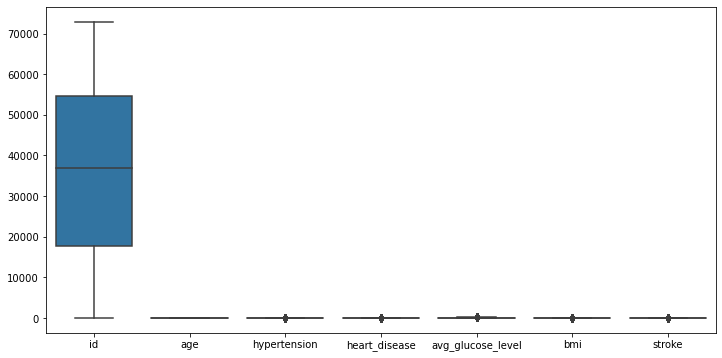

In [41]:
sns.boxplot(data=df)
plt.show()

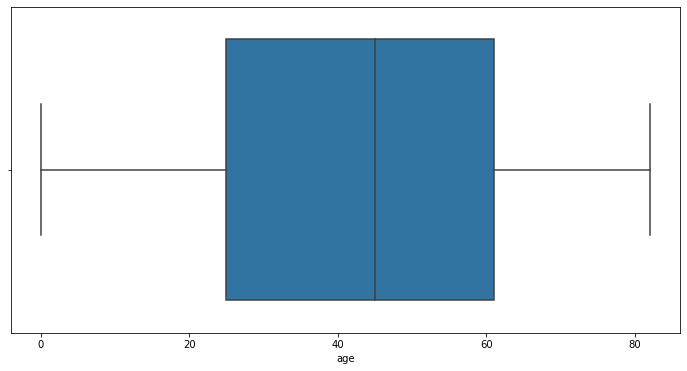

In [42]:
sns.boxplot(data=df,x='age')
plt.show()

After analysis we found that only glucose level and bmi have outliers so we have to remove them

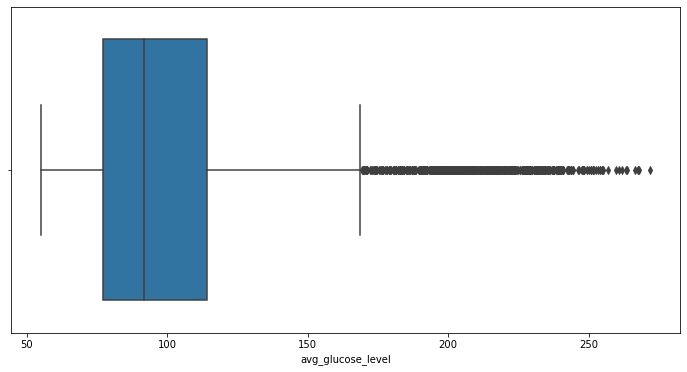

In [43]:
sns.boxplot(data=df,x='avg_glucose_level')
plt.show()

In [44]:
df['avg_glucose_level'].mean()

106.14767710371804

In [45]:
df['avg_glucose_level'].median()

91.88499999999999

In [46]:
Q1_agl=df['avg_glucose_level'].quantile(0.25)
Q3_agl=df['avg_glucose_level'].quantile(0.75)

In [47]:
IQR_agl=Q3_agl-Q1_agl
IQR_agl

36.845

In [48]:
UB_agl=Q3_agl+1.5*IQR_agl
LB_agl=Q3_agl-1.5*IQR_agl

In [49]:
df1=df[(df['avg_glucose_level']>LB_agl) & (df['avg_glucose_level']<UB_agl)]

In [50]:
df1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.1,Unknown,1
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


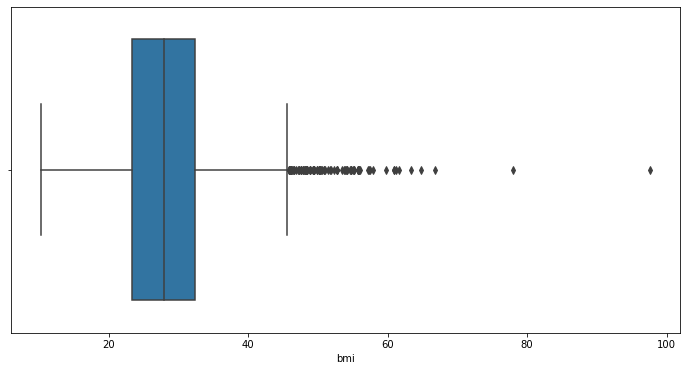

In [51]:
sns.boxplot(data=df1,x='bmi')
plt.show()

In [52]:
df1['bmi'].mean()

28.317566628041842

In [53]:
df1['bmi'].median()

27.9

In [54]:
Q1=df1['bmi'].quantile(0.25)
Q3=df1['bmi'].quantile(0.75)

In [55]:
Q3

32.3

In [56]:
Q1

23.3

In [57]:
IQR=Q3-Q1
IQR

8.999999999999996

In [58]:
UB=Q3+1.5*IQR
LB=Q3-1.5*IQR

In [59]:
df2=df1[(df1['bmi']>LB) & (df1['bmi']<UB)]

In [60]:
df2

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.1,Unknown,1
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [61]:
df2['hypertension'].unique()

array([0, 1], dtype=int64)

In [62]:
df2['heart_disease'].unique()

array([1, 0], dtype=int64)

As we can say we have removed outliers from the data

#### Converting Catogarical columns to numerical

In [63]:
df2['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [64]:
df2['gender']=df2['gender'].map({'Male':1,'Female':2,'Other':3})

In [65]:
df2['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [66]:
df2['ever_married']=df2['ever_married'].map({'Yes':1,'No':0})

In [67]:
df2['work_type'].unique()

array(['Private', 'Govt_job', 'Self-employed', 'children', 'Never_worked'],
      dtype=object)

In [68]:
df2['work_type'].value_counts()

Private          2346
Self-employed     627
Govt_job          524
children          328
Never_worked       19
Name: work_type, dtype: int64

In [69]:
z=df2['work_type'].value_counts().to_dict()

In [70]:
df2['work_type1']=df2['work_type'].map(z)

In [71]:
df2['Residence_type'].unique()

array(['Rural', 'Urban'], dtype=object)

In [72]:
df2['Residence_type']=df2['Residence_type'].map({'Rural':1,'Urban':2})

In [73]:
df2['smoking_status'].unique()

array(['never smoked', 'Unknown', 'smokes', 'formerly smoked'],
      dtype=object)

In [74]:
df2['smoking_status'].value_counts()

never smoked       1494
Unknown            1051
formerly smoked     666
smokes              633
Name: smoking_status, dtype: int64

In [75]:
aa=df2['smoking_status'].value_counts().to_dict()

In [76]:
df2['smoking_status1']=df2['smoking_status'].map(aa)

In [77]:
df2['stroke'].unique() 

array([1, 0], dtype=int64)

In [78]:
df2

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type1,smoking_status1
2,31112,1,80.0,0,1,1,Private,1,105.92,32.5,never smoked,1,2346,1494
6,53882,1,74.0,1,1,1,Private,1,70.09,27.4,never smoked,1,2346,1494
7,10434,2,69.0,0,0,0,Private,2,94.39,22.8,never smoked,1,2346,1494
8,27419,2,59.0,0,0,1,Private,1,76.15,28.1,Unknown,1,2346,1051
10,12109,2,81.0,1,0,1,Private,1,80.43,29.7,never smoked,1,2346,1494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,2,80.0,1,0,1,Private,2,83.75,28.1,never smoked,0,2346,1494
5106,44873,2,81.0,0,0,1,Self-employed,2,125.20,40.0,never smoked,0,627,1494
5107,19723,2,35.0,0,0,1,Self-employed,1,82.99,30.6,never smoked,0,627,1494
5108,37544,1,51.0,0,0,1,Private,1,166.29,25.6,formerly smoked,0,2346,666


## Logistic Regression

In [79]:
x=df2[['gender','age','hypertension','heart_disease','ever_married','work_type1','Residence_type','avg_glucose_level','bmi','smoking_status1']].values
y=df2['stroke'].values

In [80]:
x

array([[1.0000e+00, 8.0000e+01, 0.0000e+00, ..., 1.0592e+02, 3.2500e+01,
        1.4940e+03],
       [1.0000e+00, 7.4000e+01, 1.0000e+00, ..., 7.0090e+01, 2.7400e+01,
        1.4940e+03],
       [2.0000e+00, 6.9000e+01, 0.0000e+00, ..., 9.4390e+01, 2.2800e+01,
        1.4940e+03],
       ...,
       [2.0000e+00, 3.5000e+01, 0.0000e+00, ..., 8.2990e+01, 3.0600e+01,
        1.4940e+03],
       [1.0000e+00, 5.1000e+01, 0.0000e+00, ..., 1.6629e+02, 2.5600e+01,
        6.6600e+02],
       [2.0000e+00, 4.4000e+01, 0.0000e+00, ..., 8.5280e+01, 2.6200e+01,
        1.0510e+03]])

In [81]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [84]:
x_train.shape

(3075, 10)

In [85]:
y_train.shape

(3075,)

In [86]:
y_test.shape

(769,)

In [87]:
x_test.shape

(769, 10)

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
LR=LogisticRegression( max_iter=3844)

In [90]:
LR.fit(x_train,y_train)

LogisticRegression(max_iter=3844)

In [91]:
y_pred=LR.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [92]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [93]:
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix

In [94]:
df2['stroke'].value_counts() 

0    3686
1     158
Name: stroke, dtype: int64

In [95]:
LR.score(x_train,y_train)

0.9583739837398374

In [96]:
LR.score(x_test,y_test)

0.9609882964889467

In [97]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       739
           1       0.00      0.00      0.00        30

    accuracy                           0.96       769
   macro avg       0.48      0.50      0.49       769
weighted avg       0.92      0.96      0.94       769



In [98]:
confusion_matrix(y_test,y_pred)

array([[739,   0],
       [ 30,   0]], dtype=int64)

In [99]:
recall=(739/(739+30))
recall

0.9609882964889467

In [100]:
correct_prediction=739+0
Wrong_prediction=30+0
Wrong_prediction

30

In [101]:
correct_prediction

739

In [102]:
739+30

769

In [103]:
len(y_test) # This verifies that the answers are correct

769

In [104]:
from sklearn.metrics import roc_auc_score,roc_curve

#### From all the analysis we can say that logistic model is performing well as we got following predictions:

1. according to confusion matrix we got 739 right and 30 wrong predictions which matches the length of test data
2. F1-Score is 0.98
3. Recall value is 0.96 which is good for medical problem as we have to find out the score
4. Our data is imbalnced as target element i.e 'stroke' distribution is 0    3686 had no stroke
                                                                        1    158  had stroke
5. We can say our data is generalised as we can check that LR score for both the testing & training data is good from o/p 95,96.

### Hence from the dataset we can say that most of patients will not have stroke according to logistic regression.

### KNN Analysis

In [105]:
from sklearn.neighbors import KNeighborsClassifier

In [106]:
knn = KNeighborsClassifier(n_neighbors=7)

In [107]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [108]:
pred = knn.predict(x_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [109]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [110]:
from sklearn.metrics import classification_report, confusion_matrix

In [111]:
from sklearn.model_selection import cross_val_score

In [112]:
print(confusion_matrix(y_test, pred))

[[738   1]
 [ 29   1]]


In [113]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       739
           1       0.50      0.03      0.06        30

    accuracy                           0.96       769
   macro avg       0.73      0.52      0.52       769
weighted avg       0.94      0.96      0.94       769



In [114]:
LR.score(x_train,y_train)

0.9583739837398374

In [115]:
LR.score(x_test,y_test)

0.9609882964889467

In [116]:
score = roc_auc_score(y_test, pred)

In [117]:
score

0.5159900766801985

In [118]:
from sklearn.metrics import roc_curve

In [119]:
fpr,tpr,thresholds = roc_curve(y_test, pred)

In [120]:
print(fpr,tpr,thresholds)

[0.         0.00135318 1.        ] [0.         0.03333333 1.        ] [2 1 0]


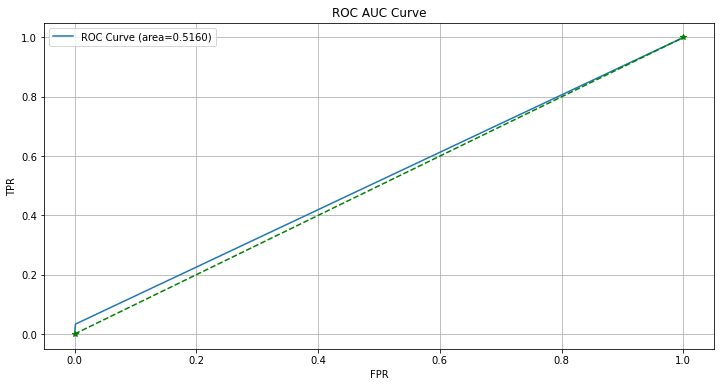

In [121]:
plt.plot(fpr, tpr, label='ROC Curve (area=%0.4f)'%score)
plt.plot([0,1], [0,1], 'g*--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC AUC Curve')
plt.legend()
plt.grid()
plt.show()

#### From all the analysis we can say that KNN model is performing well as we got following predictions:

### Decision Tree Analysis

In [122]:
x_train

array([[2.0000e+00, 2.9000e+01, 0.0000e+00, ..., 6.2480e+01, 2.9500e+01,
        1.4940e+03],
       [2.0000e+00, 4.2000e+01, 0.0000e+00, ..., 7.9990e+01, 2.6300e+01,
        1.4940e+03],
       [2.0000e+00, 2.7000e+01, 0.0000e+00, ..., 1.2728e+02, 2.3400e+01,
        1.0510e+03],
       ...,
       [2.0000e+00, 5.9000e+01, 0.0000e+00, ..., 6.7750e+01, 2.1300e+01,
        6.6600e+02],
       [2.0000e+00, 1.7000e+01, 0.0000e+00, ..., 7.8460e+01, 2.3500e+01,
        1.0510e+03],
       [1.0000e+00, 2.8000e+01, 0.0000e+00, ..., 7.5500e+01, 2.7000e+01,
        6.3300e+02]])

In [123]:
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [124]:
from sklearn.tree import DecisionTreeClassifier

In [125]:
Classifier= DecisionTreeClassifier(max_depth=3,criterion = 'entropy', random_state = 6)

In [126]:
Classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=6)

In [127]:
y_pred=Classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [128]:
from sklearn.metrics import accuracy_score

In [129]:
accuracy_score(y_test,y_pred)

0.9609882964889467

In [130]:
from sklearn.metrics import classification_report,confusion_matrix

In [131]:
confusion_matrix(y_test,y_pred)

array([[739,   0],
       [ 30,   0]], dtype=int64)

In [132]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.96      1.00      0.98       739\n           1       0.00      0.00      0.00        30\n\n    accuracy                           0.96       769\n   macro avg       0.48      0.50      0.49       769\nweighted avg       0.92      0.96      0.94       769\n'

In [133]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 6)

In [134]:
from sklearn import tree

In [135]:
text_representation=tree.export_text(Classifier)
print(text_representation)

|--- feature_1 <= 48.50
|   |--- feature_1 <= 37.50
|   |   |--- feature_7 <= 76.17
|   |   |   |--- class: 0
|   |   |--- feature_7 >  76.17
|   |   |   |--- class: 0
|   |--- feature_1 >  37.50
|   |   |--- feature_7 <= 97.83
|   |   |   |--- class: 0
|   |   |--- feature_7 >  97.83
|   |   |   |--- class: 0
|--- feature_1 >  48.50
|   |--- feature_1 <= 73.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_2 >  0.50
|   |   |   |--- class: 0
|   |--- feature_1 >  73.50
|   |   |--- feature_8 <= 28.15
|   |   |   |--- class: 0
|   |   |--- feature_8 >  28.15
|   |   |   |--- class: 0



In [136]:
with open("decistion_tree.log","w")as fout:
    fout.write(text_representation)

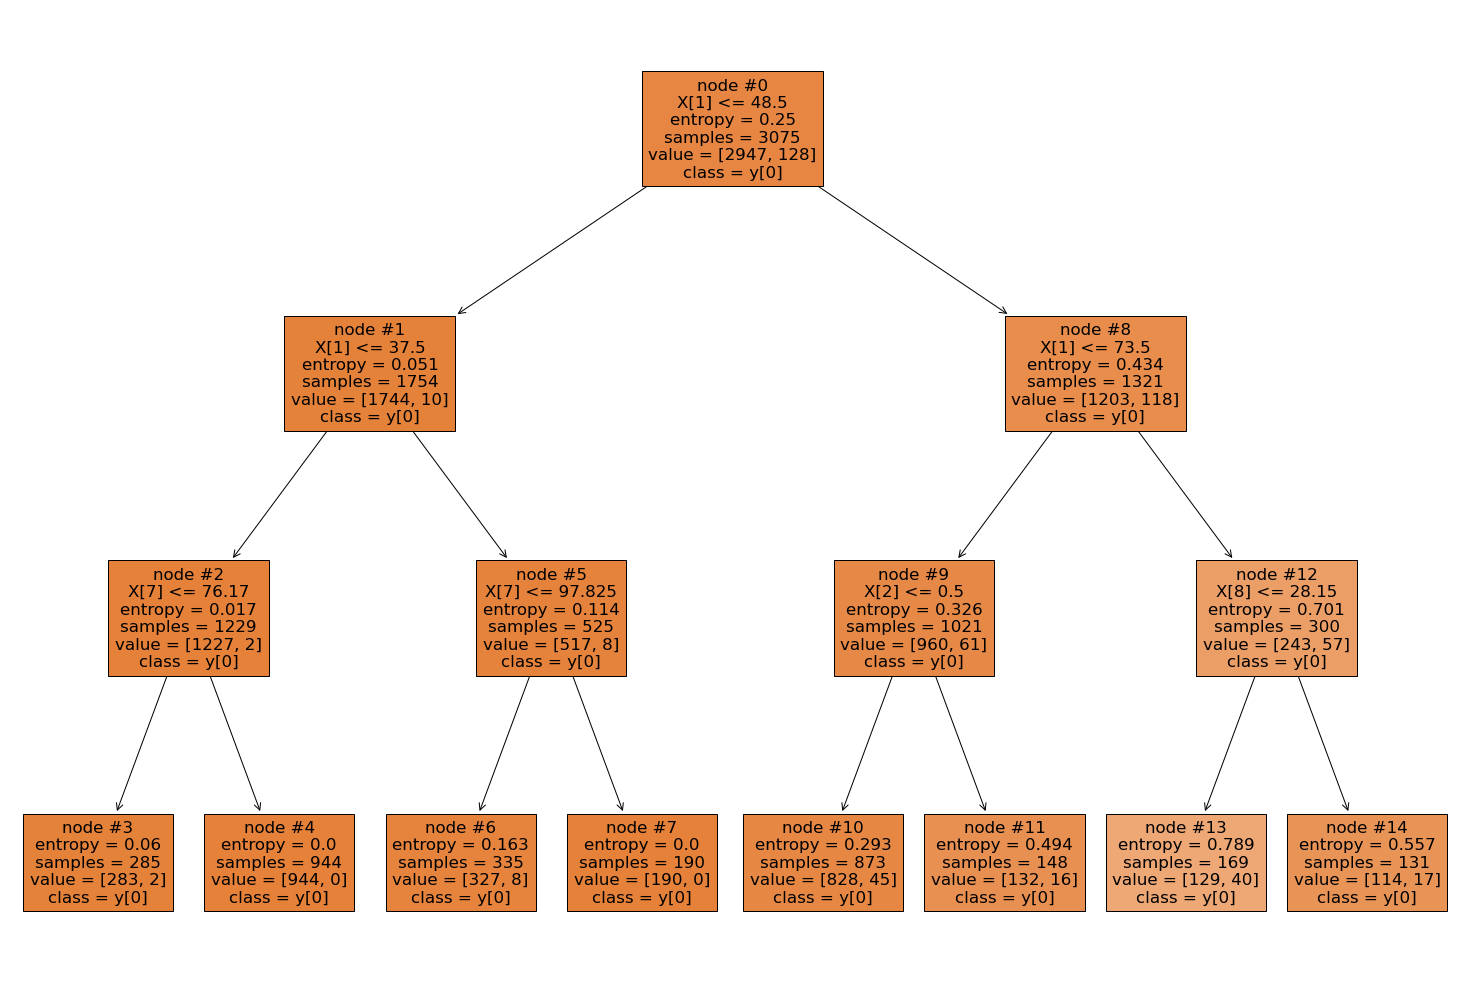

In [137]:
fig=plt.figure(figsize=(26,18))
tree.plot_tree(Classifier,filled=True,class_names=True,node_ids=True)
plt.show()

### Random Forest

In [138]:
from sklearn.ensemble import RandomForestClassifier

In [139]:
Random = RandomForestClassifier(n_estimators = 94, criterion = 'gini')

In [140]:
Random.fit(x_train,y_train)

RandomForestClassifier(n_estimators=94)

In [141]:
y_pred_Random = Random.predict(x_test)

In [142]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [143]:
accuracy_score(y_test,y_pred)

0.9609882964889467

In [144]:
from sklearn.metrics import classification_report,confusion_matrix

In [145]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.96      1.00      0.98       739\n           1       0.00      0.00      0.00        30\n\n    accuracy                           0.96       769\n   macro avg       0.48      0.50      0.49       769\nweighted avg       0.92      0.96      0.94       769\n'

In [146]:
confusion_matrix(y_test,y_pred)

array([[739,   0],
       [ 30,   0]], dtype=int64)

In [147]:
from sklearn.metrics import roc_curve

In [148]:
fpr,tpr,thresholds = roc_curve(y_test, pred)

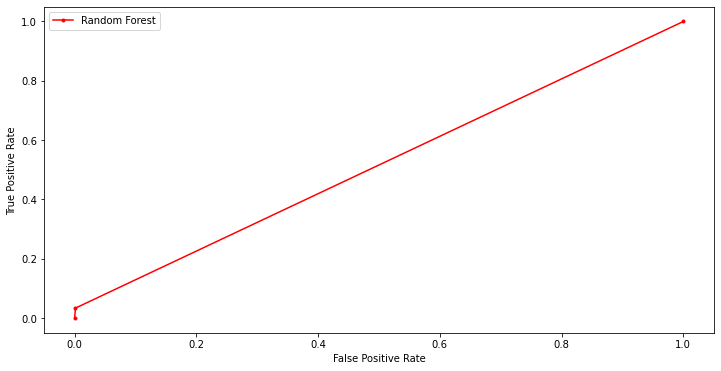

In [150]:
plt.plot(fpr, tpr, marker='.', color='red', label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### HyperParameter Tunning

In [151]:
from sklearn.model_selection import GridSearchCV

In [152]:
parameters= {'n_estimators':range(1,100),}
gridsearch= GridSearchCV(RandomForestClassifier(),parameters)
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': range(1, 100)})

In [153]:
gridsearch.best_params_

{'n_estimators': 37}

In [155]:
gridsearch.best_score_

0.95869918699187

### Randomized SearchCV

In [187]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [188]:
param_dist= {'max_depth':[3,None],
            'max_features':randint(1,9),
            'min_samples_leaf':randint(1,9),
            'criterion':['gini','entropy']}

In [189]:
Cl=RandomForestClassifier()

In [190]:
Cl_cv=RandomizedSearchCV(Cl,param_dist,cv=5)
Cl_cv.fit(x,y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F7C029D1F0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F7C018FD00>})

In [184]:
Cl_cv.best_params_

{'criterion': 'gini', 'max_depth': 3, 'max_features': 4, 'min_samples_leaf': 3}

In [185]:
Cl_cv.best_score_

0.9583739837398374

# From all the analysis done using logistic Regression, KNN, Random Forest, Decicion Tree we can say that our model is really perfoming well on all the techniques. 

# Most of the people will be saved from stroke.